In [1]:
print('Lecture-25')

Lecture-25


## __str__ ve __repr__ metotları

Ne zaman bir sınıf nesnesini str fonksiyonu ile str türüne dönüştürecek olsak str fonksiyonu ilgili sınıf nesnesi ile __str__ metodunu çağırmaktadır.

result = str(x)

ile

result = x.__str__()

def str(s):
    return s.__str__()

print(a)

ile

print(str(a))

ya da,

print(a.__str__())

tamamen işlevsel olarak eşdeğerdir

In [2]:
class Sample:
    def __init__(self, val):
        self.val = val

    def __str__(self):
        return 'Sample object, value = {}'.format(self.val)

s = Sample(100)
print(s)

Sample object, value = 100


In [3]:
class Complex:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
    
    def __str__(self):
        return '{}+{}i'.format(self.real, self.imag)
    
z = Complex(3, 2)
print(z)

3+2i


In [4]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
    
    def __str__(self):
        return '{}/{}/{}'.format(self.day, self.month, self.year)
    
d = Date(1, 10, 2024)
print(d)

1/10/2024


__str__ metodu yazılmazsa, anımsanacağı gibi bir sınıfta belli bir metot yoksa isim arama işlemi MRO sırasına göre taban sınıflarda yapılmaktadır. Her sınıf da doğrudan ya da dolaylı olarak object sınıfından türetilmiş olduğuna göre biz sınıfımız için __str__ metodunu yazmazsak en kötü olasılıkla `object` sınıfının __str__ metodu çağrılacaktır.  

__repr__ metodu: yine tipik olarak nesneyi temsil eden bir yazıyla geri dönerler. 

def repr(o):
    return o.__repr__()

Sınıfların repr metotları python'ın komut yorumlayııları tarafından bir değişkenin ismi yazılıp enter tuşuna basıldığında da çağrılmaktadır. 

In [6]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
    
    def __str__(self):
        return '{}/{}/{}'.format(self.day, self.month, self.year)
    
    def __repr__(self):
        return 'Date object: {}/{}/{}'.format(self.day, self.month, self.year)
    
d = Date(10, 12, 2019)
d

Date object: 10/12/2019

In [7]:
print(d)

10/12/2019


In [8]:
s = 'ali\nveli'
s

'ali\nveli'

In [9]:
print(s)

ali
veli


Neden bir ivarken diğerine gereksinim duyulabilmektedir? İşte bu iki metot arasındaki temel fark str metoduunun kullanıcılara yönelik teknik olmayan bir yazı geri döndürmesi, repr metodunun ise programcıya yönelik daha teknik bir yazı geri döndürmesidir.

In [10]:
a = 123
print(a.__str__())

123


In [11]:
print(a.__repr__())

123


str fonksiyonu ilgili sınıfta __str__ metodu varsa onun geri döndürdüğü yazıyı verir. fakat ilgili sınıfta __str__ sınıfı yok fakat repr metodu varsa repr metodunnu geri döndürdüğü yazııyı vermektedir.

In [14]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
    
    def __repr__(self):
        return 'Date object: {}/{}/{}'.format(self.day, self.month, self.year)

d = Date(10, 1, 2024)
print(d)
print(str(d))
print(repr(d))

Date object: 10/1/2024
Date object: 10/1/2024
Date object: 10/1/2024


Tersi durum geçerli değildir. Yani sınıfta str varsa fakat repr yoksa bu durumda repr fonksiyonu ya da komut yorumlayıcılar str metodunu çağırmazlar. artık repr metodu bu durumda taban sınıflarda aranacaktır.

str ve repr metotlarını bizim birer yazı ile (string ile) geri döndürmemiz gerek. aksi takdirde exception oluşacaktır.

## Nesnelerin Referans Sayacı

i = 10
s = Sample()

i ve s birer değişken. ancak bu değişkenleri gösterdiği yerde int türünden ve sample türünden nesneler vardır. bir nesneyi birden fazla değişken gösterebilir.

s = Sample() --> RS = 1
k = s        --> RS = 2
m = k        --> RS = 3

sample nesnesini burada 3 farklı değişken göstermektedir. python yorumlayıcısı her nesneyi kaç değişkenin gösterdiğini anbean tutmaktadır. buna nesnenin referans sayacı denilmektedir. referans sayacı program çalışırken sürekli değişebilir. 

python'da değişeknler otomatik bir biçimde yok edilmektedir. ancak nesneler onları gösteren hiçbir değişken kalmadığında (yani referans sayaçları 0 olduğunda) çöp toplayıcı mekanizma tarafından yok edilmektedir. 

bir nesnenin referans sayacının değeri sys modüündeki getrefcount isimli fonksiyon ile elde edilebilir. ancak getrefcount fonksiyonu parametre değişkennie atama yüzünden hep sayacı 1 fazla göstermektedir.

In [16]:
import sys

class Sample:
    def __del__(self):
        print('__del__ çağrıldı')

a = Sample()
print(sys.getrefcount(a))

__del__ çağrıldı
2


In [17]:
b = a
print(sys.getrefcount(a))

3


In [18]:
c = b
print(sys.getrefcount(a))

4


In [19]:
c = None
print(sys.getrefcount(a))

3


In [20]:
b = None
print(sys.getrefcount(a))

2


In [21]:
a = None
print(sys.getrefcount(a))

__del__ çağrıldı
35846


## Çöp Toplayıcı Mekanizması (Garbage Collectors)

Çöp toplama mekanizması referans sayacı temelinde çalışmaktadır. her nesnenin kaç referans tarafından gösterildiği nesnenin içerisindeki bir referans sayacı tarafından tutulur. Bu referans sayacı 0'a düştüğünde nesne çöp durumuna gelir ve çöp toplayıcı mekanizma tarafından hemen bellekten yok edilir. 

Nesnenin referans sayacı nasıl eksilebilir?

- değişkene başka bir değer atanmış olabilir. dolayısıyla artık değişken eski nesneyi değil yeni nesneyi gösteri hale gelmiştir. bu durumda eski nesnenin referans sayacı bir eksiltilir.
- değişken bir yerel ya da parametre değişkenidir. fonksiyondan çıkıldığında bu yerel ya da parametre değişkeni yok edilir. dolayısıyla artık o eski nesneyi göstermez hale gelir. 
- sınıfın bir özniteliği bir nesneyi gösterebilir. sınıf nesnesi yok edildiğinde artık o değişken de o nesneyi göstermez hale gelir.

İşte bir nesnenin referans sayacı sıfıra düşer düşmez çöp toplayıcı nesneyi yok etmeden önce sınıfın __del__ isimli bir metodunu çağırır.

In [22]:
class Sample:
    def __del__(self):
        print('Nesne yok edilecek!')
    
s = Sample()
print('Referans Sayacı 1')

k = s
print('Referans Sayacı 2')

k = None
print('Referans Sayacı 1')

s = None
print('Referans Sayacı 0')

Referans Sayacı 1
Referans Sayacı 2
Referans Sayacı 1
Nesne yok edilecek!
Referans Sayacı 0


In [23]:
class A:
    def __init__(self):
        print('A.__init__ çağrıldı')
    
    def __del__(self):
        print('A.__del__ çağrıldı')
    
class B(A):
    def __init__(self):
        super().__init__()
        print('B.__init__ çağrıldı')
    
    def __del__(self):
        print('B.__del__ çağrıldı')
        super().__del__()

b = B()

A.__init__ çağrıldı
B.__init__ çağrıldı


In [24]:
b = None

B.__del__ çağrıldı
A.__del__ çağrıldı


In [25]:
class Sample:
    def __init__(self, x):
        self.x = x
        print('Sample.__init__ çağrıldı: {}'.format(x))

    def __del__(self):
        print('Sample.__del__ çağrıldı: {}'.format(self.x))

a = Sample(10)

Sample.__init__ çağrıldı: 10


In [26]:
b = Sample(20)

Sample.__init__ çağrıldı: 20


In [27]:
def foo():
    x = Sample(30)
    y = Sample(40)

In [28]:
print('first')
foo()
print('second')

first
Sample.__init__ çağrıldı: 30
Sample.__init__ çağrıldı: 40
Sample.__del__ çağrıldı: 30
Sample.__del__ çağrıldı: 40
second


__del__ metotları, __init__ metotları tarafından yapılan birtakım işlemleri geri alınması için kullanılabilmektedir. Örneğin __init__ metodunda bir dosya açılmış olabilir. bu dosya __del__ metodunda kapatılabilir. ancak ne olursa olsun bu dilde __del__ metoduna çok az durumda gerçek bir biçimde gereksinim duyulabilir.

## Operatör Metotları (Operator Overloading)

Operatör metotları sayesinde mevcut python operatörleri programcının kendi sınıflarıyla da çalışılabilir hale getirilebilmektedir. operatör metotları __xxx__ biçiminde özel isimlerle oluşturulmaktadır. 

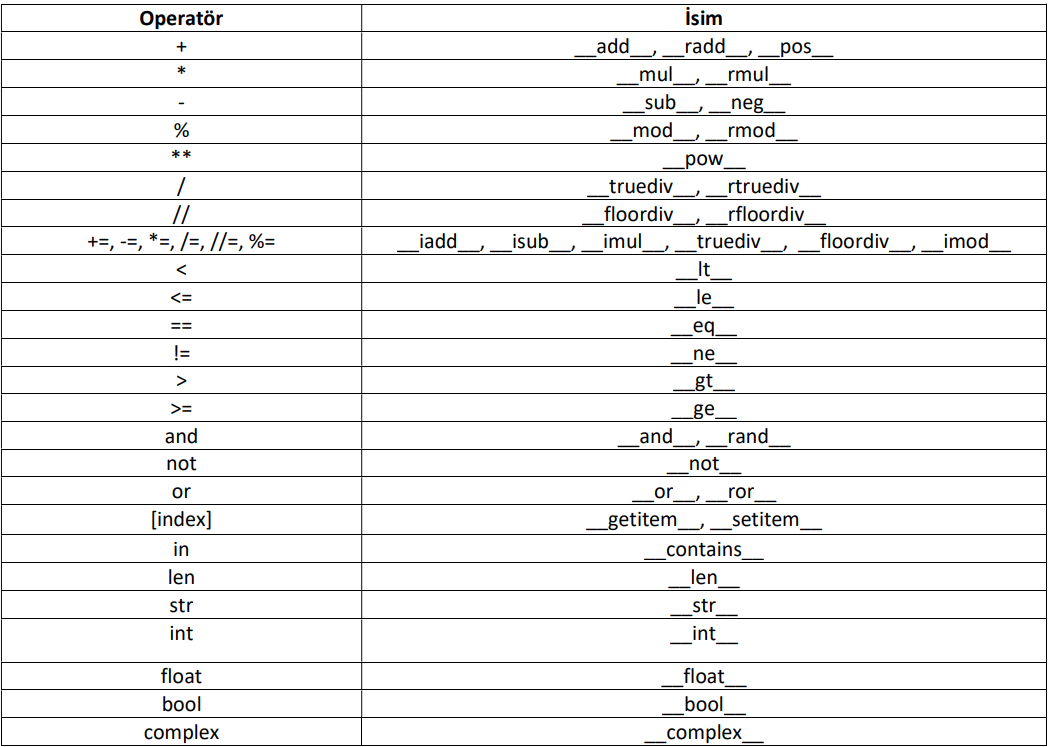

a değişkeni X isimli bir sınıf türünden olmak üzere;

a + b

ile

a.__add__(b)

ya da

X.__add__(a, b)

işlemleri eşdeğerdir. a + b işlemini yaptığımızda arka planda bu işlem __add__ isimli metot tarafından yapılmaktadır. yorumlayıcı bir operatörle karşılaştığında önce operandların türlerine bakar. soldaki operatör built-in sınıf türünden değilse soldaki operandın ilişkin olduğu sınıfın ilgili operatör metodunu çağırır. o operatör metodundan elde edilen değer de o metodun geri dönüş değeri olacaktır.

In [38]:
class Number:
    def __init__(self, number):
        self.number = number
    
    def disp(self):
        print(self.number)
    
    def __add__(self, x):
        print('Toplanıyor..')
        return Number(self.number + x.number)
    
    def __sub__(self, x):
        return Number(self.number - x.number)

    def __mul__(self, x):
        print('Çarpılıyor..')
        return Number(self.number * x.number)
    
    def __truediv__(self, x):
        return Number(self.number / x.number)

    def __str__(self):
        return str(self.number)

x = Number(10)
y = Number(20)
z = Number(2)

In [35]:
print(z)

2


In [39]:
k = x + y * z
print(k)

Çarpılıyor..
Toplanıyor..
50


burada aslında,

z = x + y

işlemi ile, 

z = x.__add__(y)

ya da 

Number.__add__(x, y)

işlemi tamamen eşdeğerdir.

Tabii python'da farklı parametrik yapılara ilişkin aynı isimli metotlar (method overloading) yazılamadığı için farklı türlerle aynı işlemi yapan operatör metotlarının tek bir metot biçiminde yazılması gerekmektedir. örneğin yukarıdaki operatör metoduyla bir number nesnesi ile bir int nesneyi toplayamayız. bunun için metot içerisinde tür kontrolü yapıp uygun bir stratejinin belirlenmesi gerekir.

In [40]:
10 + x

TypeError: unsupported operand type(s) for +: 'int' and 'Number'

In [41]:
class Number:
    def __init__(self, number):
        self.number = number
    
    def disp(self):
        print(self.number)
    
    def __add__(self, x):
        if isinstance(x, (int, float)):
            return Number(self.number + x)
        return Number(self.number + x.number)
    
    def __sub__(self, x):
        if type(x) is int or type(x) is float:
            return Number(self.number - x)
        return Number(self.number - x.number)

    def __mul__(self, x):
        if isinstance(x, (int, float)):
            return Number(self.number * x)
        return Number(self.number * x.number)
    
    def __truediv__(self, x):
        if isinstance(x, (int, float)):
            return Number(self.number / x)
        return Number(self.number / x.number)

    def __str__(self):
        return str(self.number)
    
x = Number(10)
y = Number(20)

z = x + y
print(z)

z = x + 10
print(z)

30
20


In [42]:
type(z)

__main__.Number

Karşılaştırma işlemleri için karşılaştırma operatör metotlarının yazılması gerekir. bu metotların geri dönüş değerlerinni bool türünden olması anlamlıdır.